Predictor for league of legends game winners, based on events happened during the game. Also practice with seaborn visualization.

In [1]:
# Import packages to be used in notebook.
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from xgboost import XGBRFClassifier, XGBClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load data and display basic info.
df = pd.read_csv('data/high_diamond_ranked_10min.csv')
display(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


None

We have all numerical data and fortunately no null values to address. However, we have more columns than the default display allows us to see, so we will adjust the pandas display option. 

In [3]:
# Set maximum number of columns displayed to 40.
pd.set_option('display.max_columns', 40)
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
# Drop gameId column, since this is simply an identifier for each match
df.drop('gameId', axis=1, inplace=True)
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
# Create df with no removed features.
df_big = df.copy()

In [6]:
# Create df with only target variable and directly controllable aspects of 
# the game.
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 
                'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 
                'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 
                'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 
                'redDragons', 'redHeralds', 'redTowersDestroyed', 
                'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,195,36,15,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,174,43,12,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,186,46,15,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,201,55,15,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,210,57,17,2,1,6,6,7,1,0,0,225,67


In [7]:
# Create functions to easily visualize correlation as well as general 
# data distribution and outliers.

def corr_heatmap(df, digits=3, cmap='coolwarm'):
    """
    Creates a correlation heatmap to easily visualize multicollinearity
    that might be present in the dataframe.

    Args:
        df (DataFrame) : DataFrame with features to check multicollinearity on.
        digits (int) : Number of decimal places to display
        cmap (str) : Colormap to display correlation range.

    Returns:
        fig : Matplotlib Figure
        ax : Matplotlib Axis
    """
    # Create correlation matrix from dataframe
    correl = df.corr().round(digits)

    # Create mask for upper triangle of matrix
    mask = np.zeros_like(correl)
    mask[np.triu_indices_from(mask)] = True

    #Create heatmap correlation matrix
    fig, ax = plt.subplots(figsize=((len(df.columns)),(len(df.columns))))
    sns.heatmap(correl, annot=True, ax=ax, cmap=cmap, vmin=-1, vmax=1,\
                mask=mask);
    return fig, ax

    
def visual_eda(df, target, col):
    """
    Plots a histogram + KDE, boxplot, and scatter plot with linear regression 
    line of the specified column. Use to visualize shape of data, outliers, 
    and check column's correlation with target variable.

    Args:
        df (DataFrame) : DataFrame containing column to plot
        target (str) : Name of target variable.
        col (str) : Name of the column to plot.

    Returns:
        fig : Matplotlib Figure
        gs : Matplotlib GridSpec
    """
    # Create copy variables of df and col
    data = df[col].copy()
    name = col

    # Calc mean and mean
    median = data.median().round(2)
    mean = data.mean().round(2)
    
    
    # Create gridspec for plots
    fig = plt.figure(figsize=(11, 6))
    gs = GridSpec(nrows=2, ncols=2)

    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[:, 1])

    # Plot distribution 
    sns.histplot(data,alpha=0.5,stat='density',ax=ax0)
    sns.kdeplot(data,color='green',label='KDE',ax=ax0)
    ax0.set(ylabel='Density',title=name)
    ax0.set_title(F"Distribution of {name}")
    ax0.axvline(median,label=f'median={median:,}',color='black')
    ax0.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
    ax0.legend()

    # Plot Boxplot
    sns.boxplot(data,x=col,ax=ax1)
    ax1.set_title(F"Box Plot of {name}")

    # Plot Scatterplot to illustrate linearity
    sns.regplot(data=df, x=col, y=target, line_kws={"color": "red"}, ax=ax2)
    ax2.set_title(F"Scatter Plot of {name}")

    # Tweak Layout & Display
    fig.tight_layout()
   
    return fig, gs

(<Figure size 2808x2808 with 2 Axes>, <AxesSubplot:>)

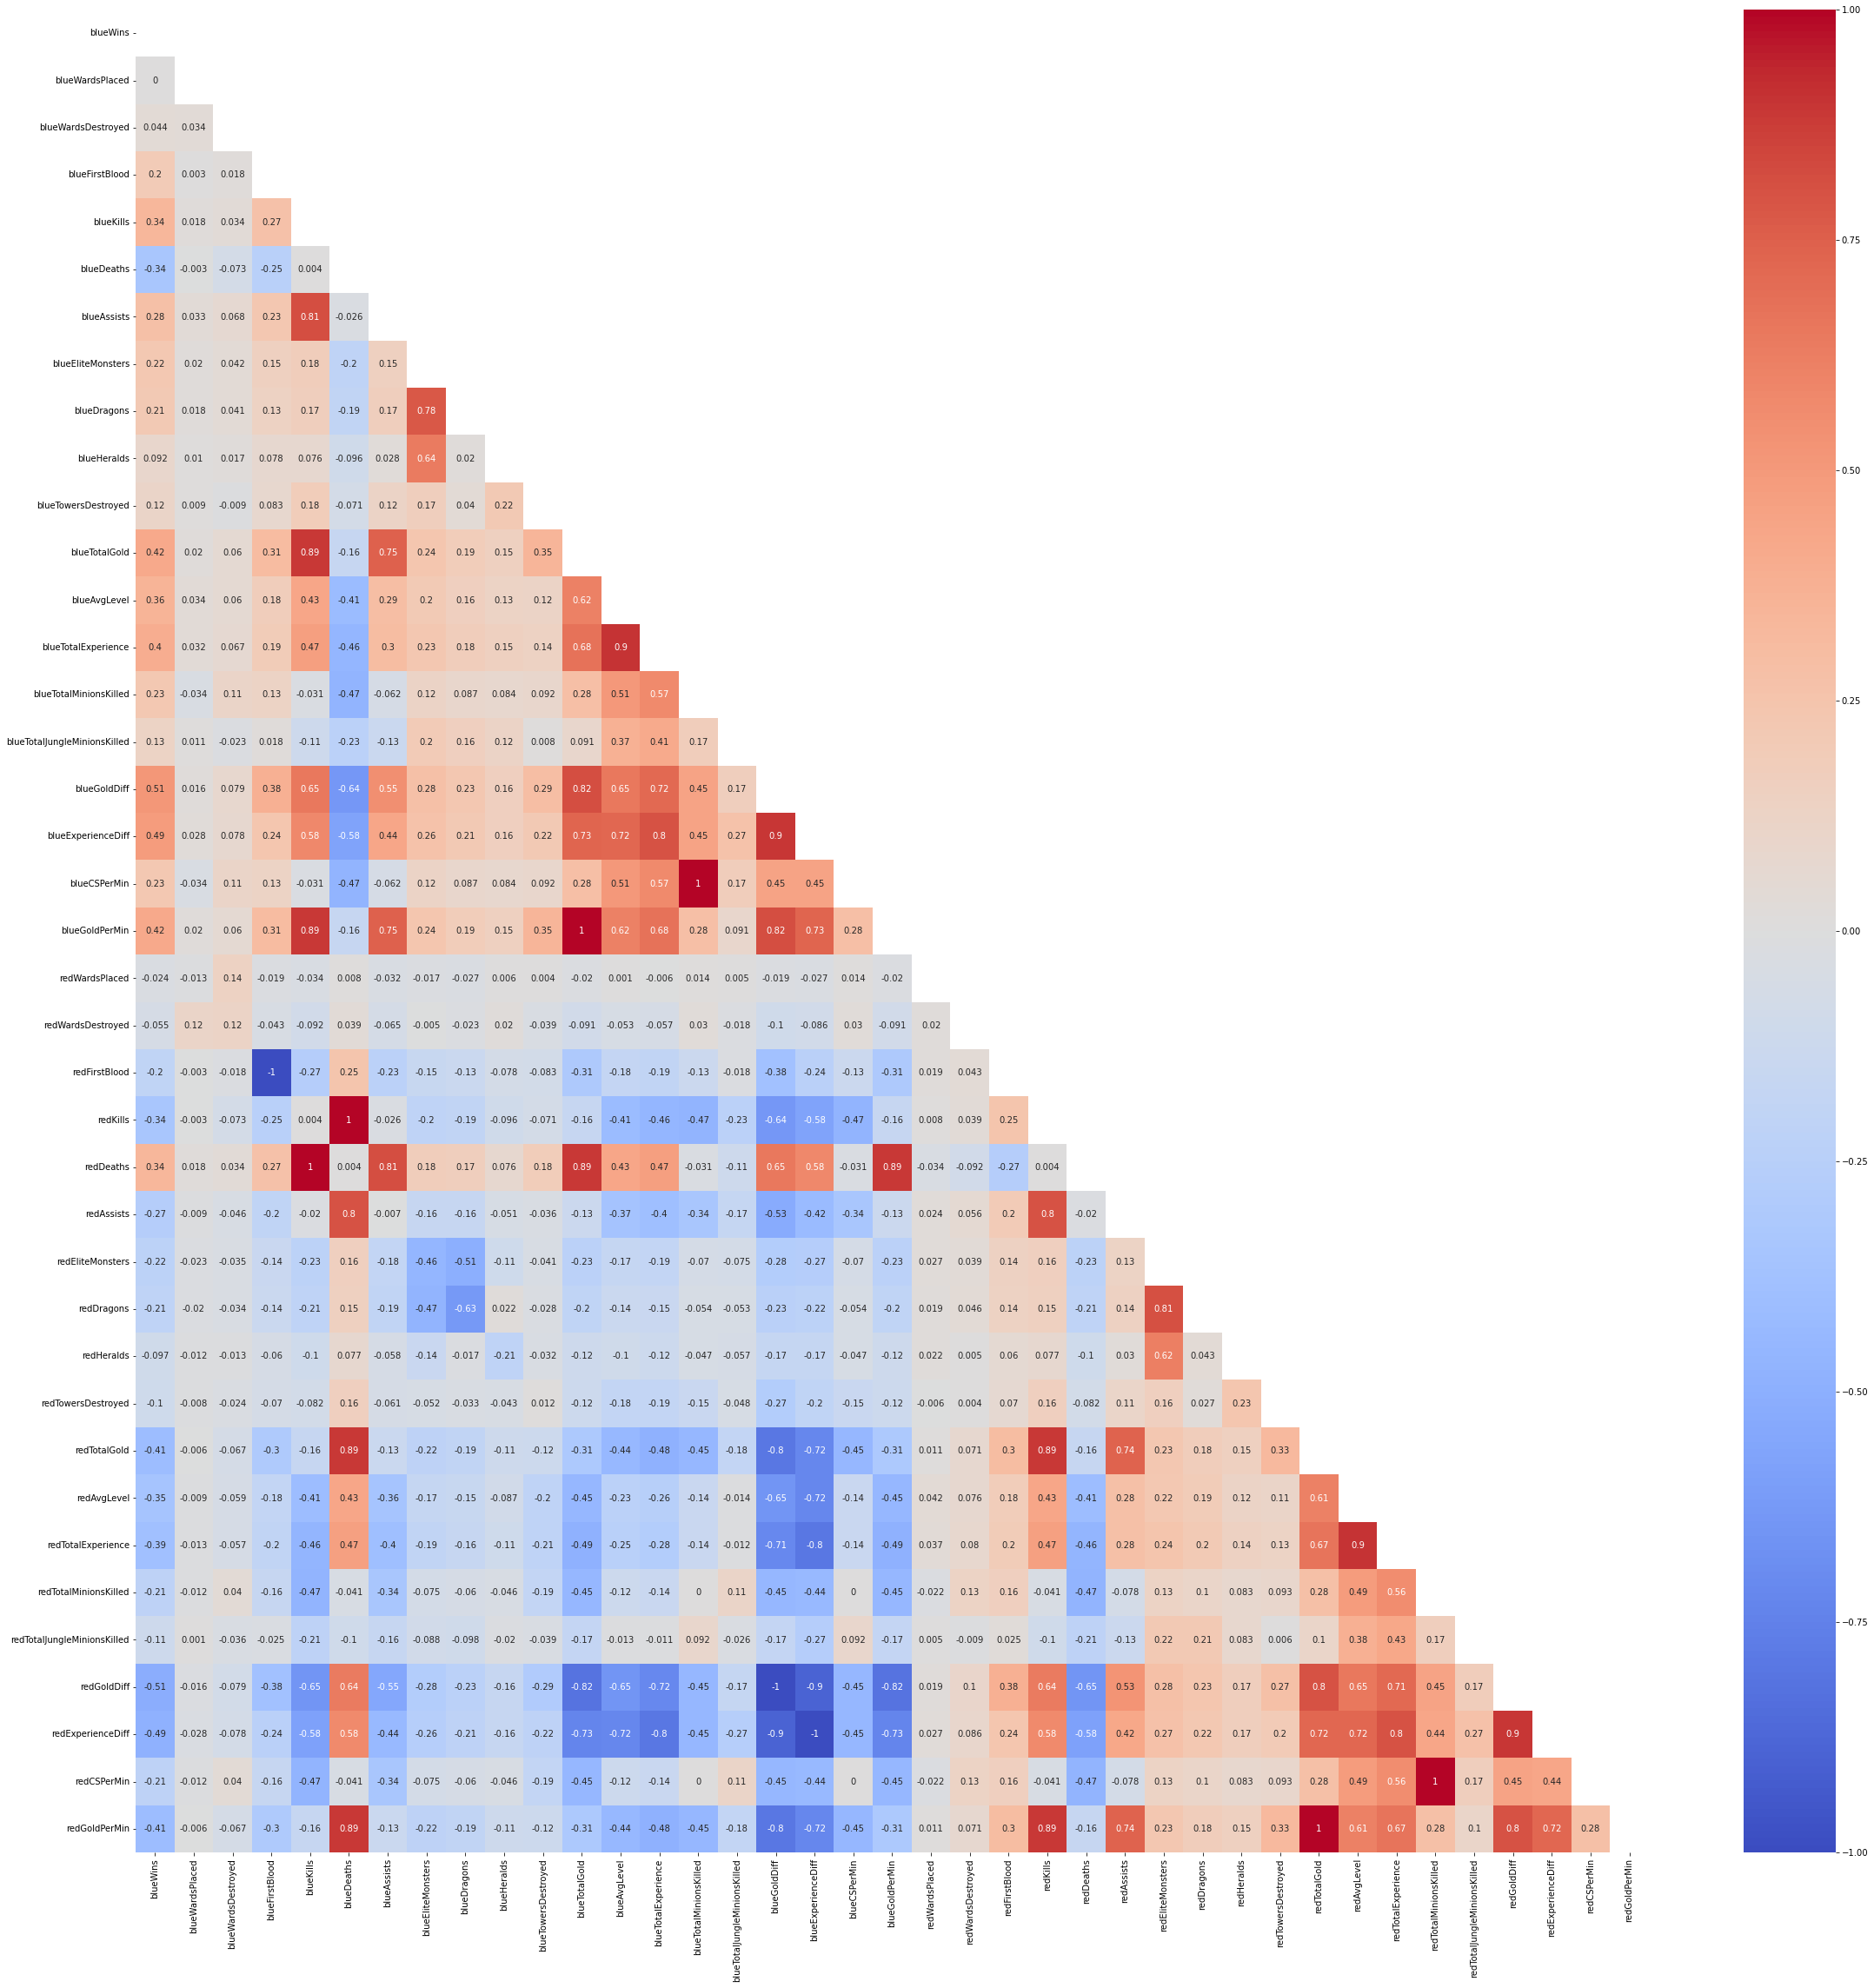

In [8]:
# Create correlation heatmap for df_big.
corr_heatmap(df_big)

We can see that there are multiple features that have high multicollinearity. This is a big problem when considering a logistic regression, and so we will avoid using df_big for our logistic regression model.

(<Figure size 1656x1656 with 2 Axes>, <AxesSubplot:>)

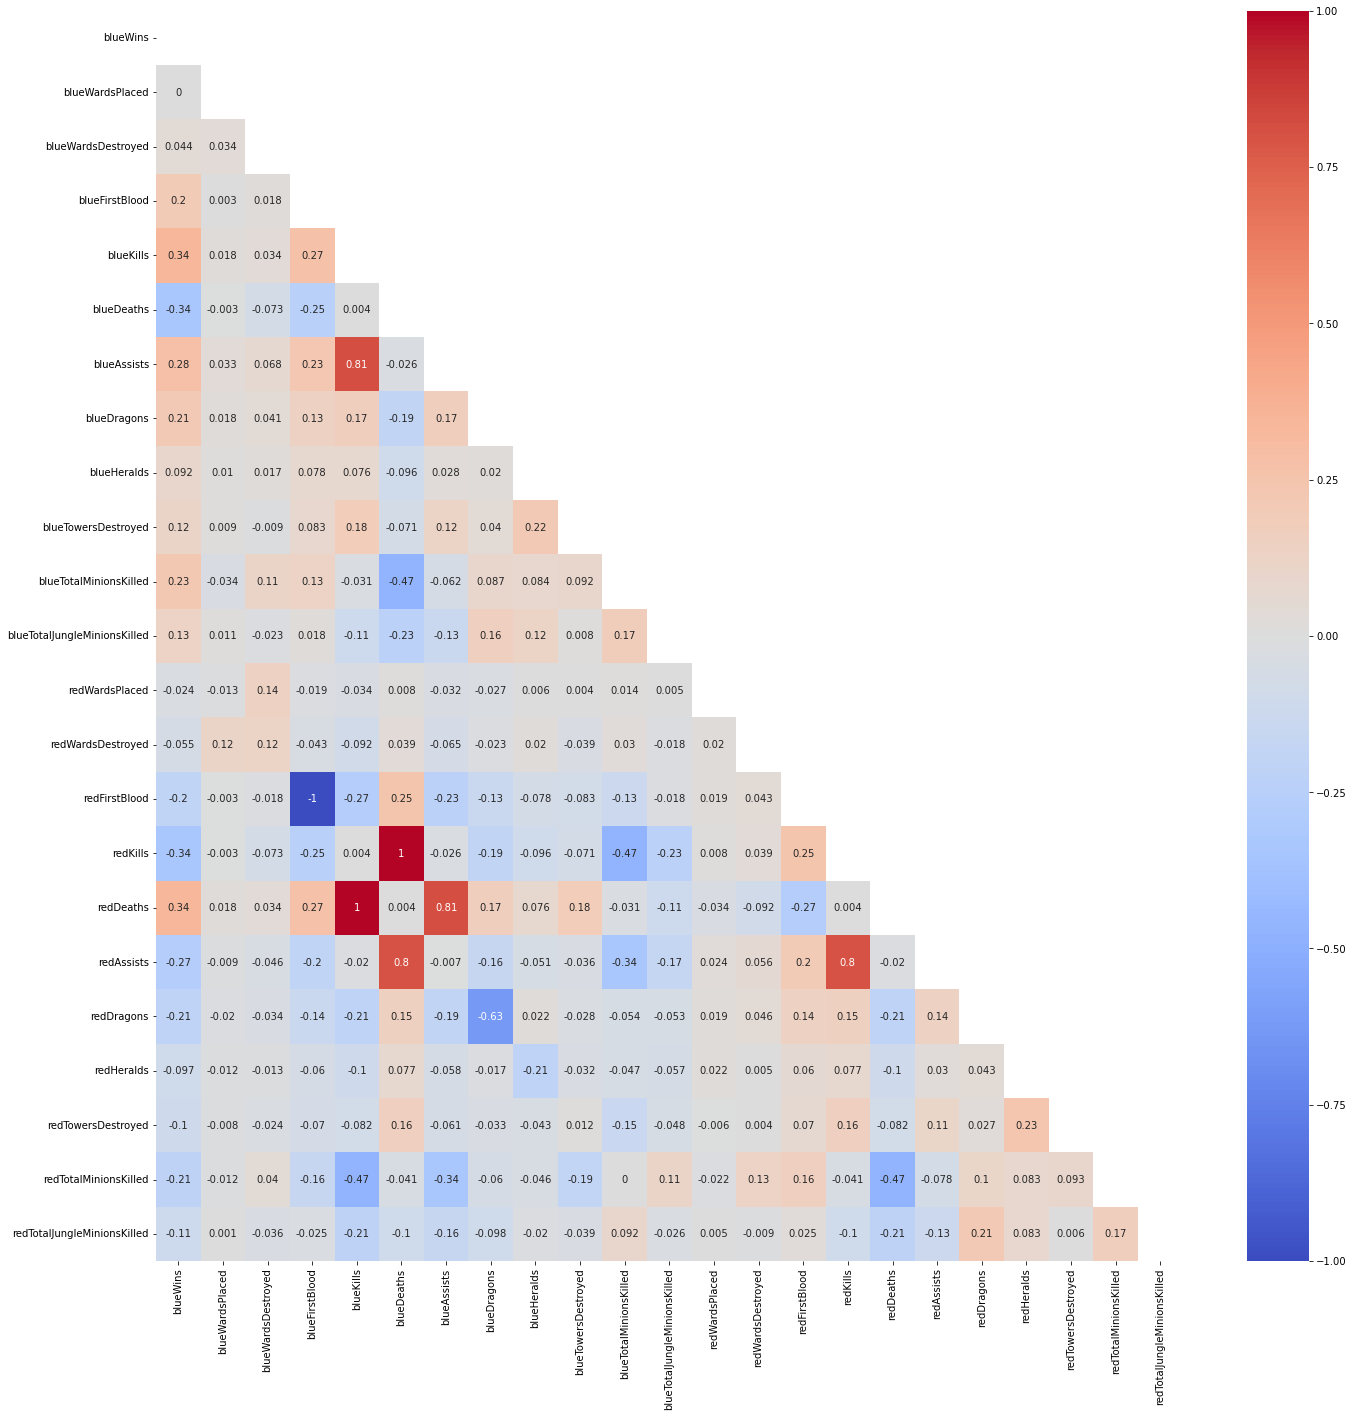

In [9]:
# Create correlation heatmap for df_select.
corr_heatmap(df_select)

Even though multicollinearity is not as much of an issue in this dataframe, we still have some features with perfect multicollinearity: redFirstBlood, redKills, and redDeaths. These features are perfect inverses of blueFirstBlood, blueDeaths, and blueKills respectively, and so we will go ahead and remove those columns to prepare our dataset for logistic regression.

In [10]:
# Drop highly columns with high multicollinearity.
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], 
               inplace=True)
df_select.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

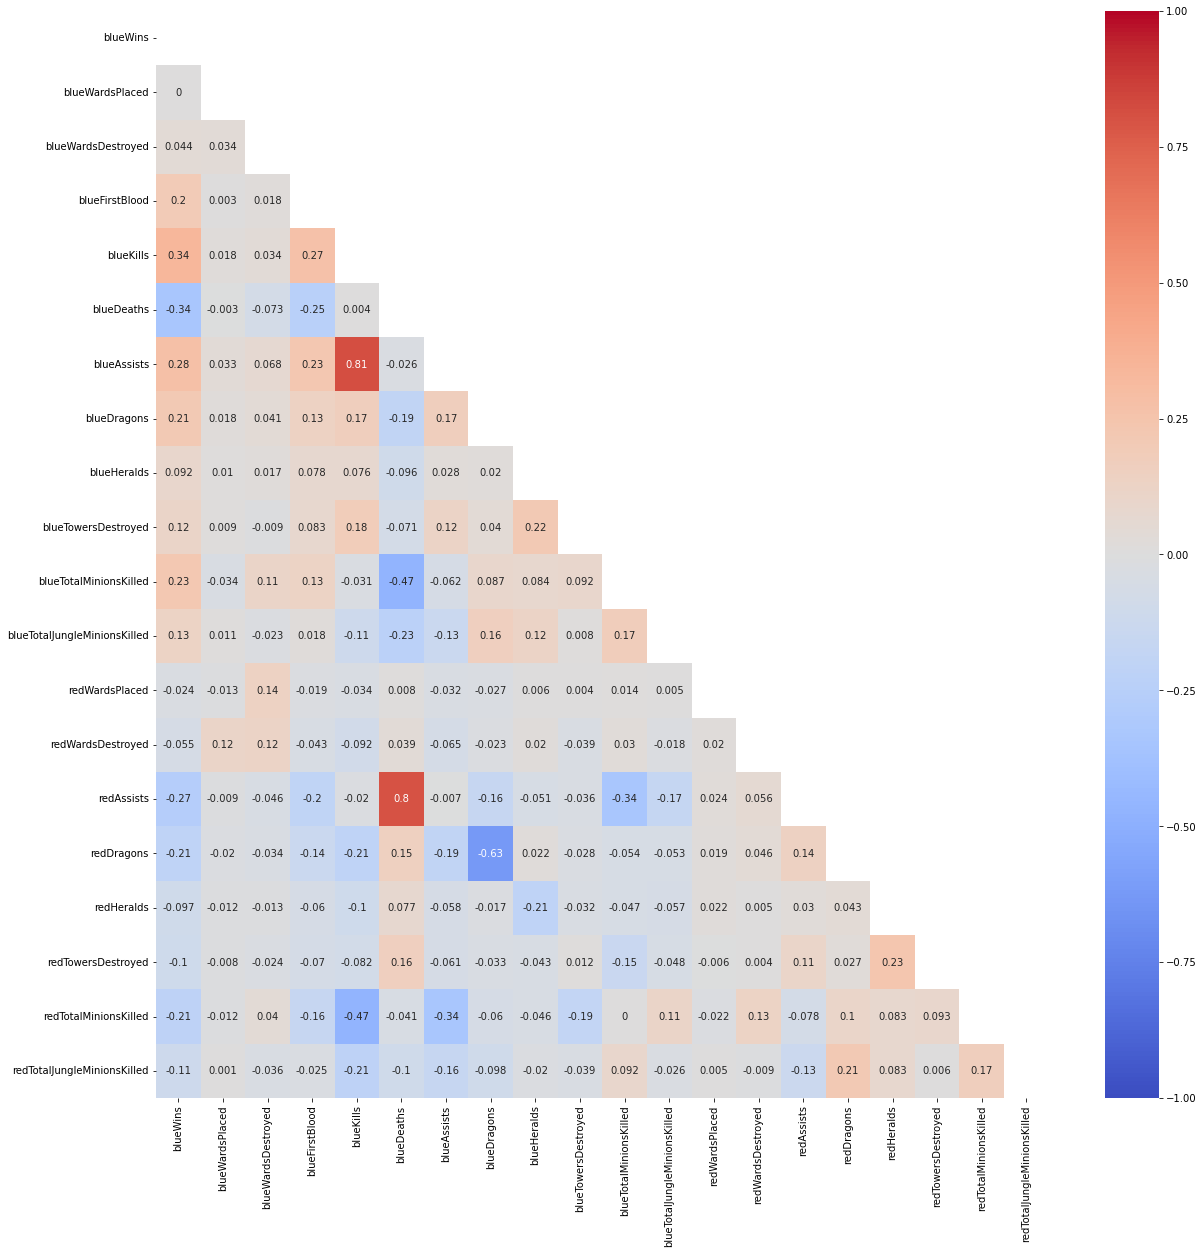

In [11]:
# Create correlation heatmap to verify that we no longer have 
# multicollinearity.
corr_heatmap(df_select)

Although redAssists and blueAssists do have somewhat high correlation with blueDeaths and blueKills respectively, we will leave those features in our dataframe since the correlation coefficients are not too high, and the impact of assists on the match outcome is still important to our analysis.

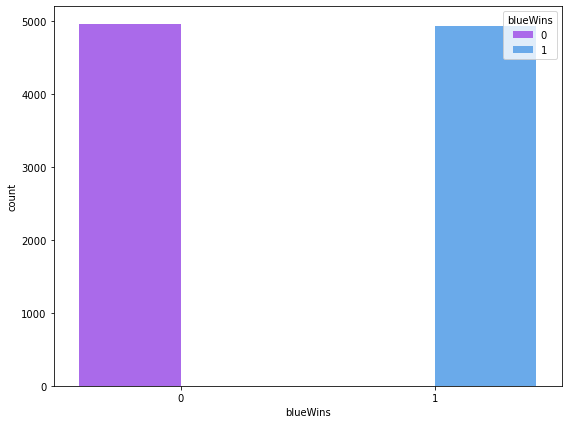

In [12]:
# Plot histogram
fig, ax = plt.subplots(figsize=(8,6))
# sns.histplot(x='blueWins', data=diff_df, hue='blueWins', palette='Set1',bins=(2), kde=False)
sns.countplot(x='blueWins', data=df_select, hue='blueWins', palette='cool_r')

# Save as image
plt.tight_layout()

We can also see that we do not have an issue of class imbalance in this dataset.

Next, we will examine the general distribution how the total experience and gold are correlated with our target variable in addition to their distributions and outliers.

In [13]:
# Plot visualization for blueTotalExperience vs blueWins.
visual_eda(df_big, 'blueWins', 'blueTotalExperience');

AttributeError: 'float' object has no attribute 'round'

In [ ]:
# Plot visualization for redTotalExperience vs blueWins.
visual_eda(df_big, 'blueWins', 'redTotalExperience');

In [ ]:
# Plot visualization for blueTotalGold vs blueWins.
visual_eda(df_big, 'blueWins', 'blueTotalGold');

In [ ]:
# Plot visualization for redTotalGold vs blueWins.
visual_eda(df_big, 'blueWins', 'redTotalGold');

# MODEL

In [ ]:
# Create functions to facilitate scaling, fiting and evaluating multiple 
# dataframes.

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 
    """
    Displays evaluation metrics including classification report, confusion
    matrix, ROC-AUC curve.
    
    If the argument 'params' is passed, will display a table of the 
    parameters hyperparameters used in the model.

    Args:
        df (DataFrame) : DataFrame with features to check multicollinearity on.
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
    """
        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.plot_roc_curve(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)
        
    
def split_scale(df, target, scaler=StandardScaler()):
    """
    Creates train-test splits and scales training data.

    Args:
        df (DataFrame): DataFrame with features and target variable.
        target (str): Name of target variable.
        scaler (scaler object): Scaler to use on features DataFrame. Default
                                is StandardScaler.
        
    Returns:
        X_train (DataFrame) : Training data with scaled feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with scaled feature variables.
        y_test (Series) : Testing data with target variable.
    """
    
    
    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Get list of column names
    cols = X_train.columns
    
    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):
    """
    Fits model on training data and displays classification evaluation metrics.

    Args:
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
        model (classifier object) : Model after fitting on training data.
    """
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

In [ ]:
# Create training and test data splits.
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df_select, 'blueWins')
X_train_big, X_test_big, y_train_big, \
             y_test_big = split_scale(df_big, 'blueWins')

In [ ]:
# Fit and evaluate df_select on a Logistic Regression model.
log_select = fit_eval(LogisticRegressionCV(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

In [ ]:
# Create parameter grid for Logistic Regression gridsearch and fit to data.
log_reg = LogisticRegression(random_state=42)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1e6,1e12],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'fit_intercept': [True, False],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid = GridSearchCV(log_reg, params, scoring='recall_macro')
log_grid.fit(X_train_select, y_train_select)

In [ ]:
# Print best params for log_grid
log_grid.best_params_

In [ ]:
# Evaluate best estimating model.
evaluate_model(log_grid.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

In [ ]:
# Create parameter grid for Logistic Regression gridsearch and fit to data.
log_reg_ref = LogisticRegression(random_state=42)

params = {'C': [0.0001, 0.001],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid_refined = GridSearchCV(log_reg_ref, params, scoring='recall_macro')
log_grid_refined.fit(X_train_select, y_train_select)

In [ ]:
# Print best params for log_grid_refined
log_grid_refined.best_params_

In [ ]:
# Evaluate best estimating model.
evaluate_model(log_grid_refined.best_estimator_, X_train_select, \
               y_train_select, X_test_select, y_test_select, params=True)

In [ ]:
# Fit and evaluate Random Forest on df_select.
fit_eval(RandomForestClassifier(random_state=42), X_train_select, \
         y_train_select, X_test_select, y_test_select)

In [ ]:
# Fit and evaluate Random Forest on df_big. 
fit_eval(RandomForestClassifier(random_state=42), X_train_big, y_train_big, \
                                                  X_test_big, y_test_big)

### df_select

In [ ]:
# Fit and evaluate XGBoost on df_select.
xgb_select = fit_eval(XGBRFClassifier(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

### df_big

In [ ]:
# Fit and evaluate XGBoost on df_big.
fit_eval(XGBRFClassifier(random_state=42), \
         X_train_big, y_train_big, X_test_big, y_test_big)

In [ ]:
# Create parameter grid for XGBoost Random Forest gridsearch and fit to data.
xgb_rf = XGBRFClassifier(random_state=42)

params = {'learning_rate': [0.03, 0.05, 0.06],
          'max_depth': [4, 5, 6],
          'min_child_weight': [2, 3, 4],
          'subsample': [0.3, 0.4, 0.5],
          'n_estimators': [100]}
xgb_grid = GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid.fit(X_train_select, y_train_select)

In [ ]:
# Print best params for xgb_grid
xgb_grid.best_params_

In [ ]:
# Evaluate best estimating model.
evaluate_model(xgb_grid.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

improvement in our recall score by 0.49% smol, but can be improved

In [ ]:
# Create parameter grid for XGBoost Random Forest gridsearch and fit to data.
xgb_rf_ref = XGBRFClassifier(random_state=42)

params = {'learning_rate': [0.0001, 0.001],
          'max_depth': [6, 7, 8],
          'min_child_weight': [2, 3, 4],
          'subsample': [0.3, 0.5, 0.7],
          'n_estimators': [100]}
xgb_grid_refined = GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid_refined.fit(X_train_select, y_train_select)

In [ ]:
# Print best params
xgb_grid_refined.best_params_

In [ ]:
# Evaluate best estimating model.
evaluate_model(xgb_grid_refined.best_estimator_, X_train_select, \
               y_train_select, X_test_select, y_test_select, params=True)

We can see that with a macro recall score of 0.7170 on the testing data, this seems to be the model with the best predictive ability! We can also see that the score on the training data is 0.7484, showing that we do not have a serious issue of under or overfitting.

In [ ]:
# Evaluate best estimating Logistic Regression model.
evaluate_model(log_select, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

In [ ]:
# Evaluate best estimating XGBoost model.
evaluate_model(xgb_grid_refined.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

## Logistic Regression Coefficient Analysis

In [ ]:
# Extract coefficients from log_grid.best_estimator_ model.
log_coeff = pd.Series(log_select.coef_.flatten(),
               index=X_train_select.columns).sort_values(ascending=False)
log_coeff

In [ ]:
# Convert log coefficients to odds and subtract 1 to display change in odds.
log_odds = np.exp(log_coeff) - 1
log_odds

In [ ]:
# Change name of columns
renamed_cols = {'blueKills': 'Kills',
                'blueTotalJungleMinionsKilled': 'Total Jungle Minions Killed',
                'blueTotalMinionsKilled': 'Total Minions Killed',
                'blueTowersDestroyed': 'Towers Destroyed',
                'blueDragons': 'Dragons Killed',
                'blueHeralds': 'Heralds Killed',
                'blueFirstBlood': 'First Blood',
                'blueAssists': 'Assists',
                'blueWardsDestroyed': 'Wards Destroyed',
                'blueWardsPlaced': 'Wards Placed',
                'redWardsDestroyed': 'Enemy Wards Destroyed',
                'redHeralds': 'Enemy Heralds Killed',
                'redTowersDestroyed': 'Enemy Towers Destroyed',
                'redAssists': 'Enemy Assists',
                'redWardsPlaced': 'Enemy Wards Placed',
                'redDragons': 'Enemy Dragons Killed',
                'redTotalJungleMinionsKilled': 'Enemy Total Jungle Minions Killed',
                'redTotalMinionsKilled': 'Enemy Total Minions Killed',
                'blueDeaths': 'Enemy Kills'
               }

log_odds.rename(renamed_cols, inplace=True)
log_odds

In [ ]:
# Set theme and style for plots.
sns.set_theme('talk')
sns.set_style('darkgrid')

In [ ]:
# Create bar plot of feature coefficients as odds.
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x=log_odds.values, y=log_odds.index, palette='cool', ax=ax, orient='h')

ax.set_title('Logistic Regression Feature Coefficients vs. Win Odds')
ax.set_xlabel('Change in Odds of Winning')
ax.set_ylabel('Element of Game')
ax.set_xlim([-.6, 1.1]);

# ax.set_xticks([-.15,.15])
# ax.set_xticklabels(['Decrease in Odds','Increase in Odds'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

According to our bar plot based on the Logistic Regression model, we see that champion kills and deaths within the first 10 minutes of the match have by far the most impact on the outcome of a match. We can see that total lane minions and total jungle creeps and dragons are also of high importance. Surprisingly, Heralds, vision wards, and towers are of least importance.

Because our displayed units are in odds, we can see that 1 standard deviation increase in each of the above features will result in the corresponding percent increase or decrease in the odds of winning.

In [ ]:
# Extract coefficients from log_grid.best_estimator_ model.
xgb_importance = pd.Series(xgb_grid_refined.best_estimator_.feature_importances_,
               index=X_train_select.columns).sort_values(ascending=False)
xgb_importance

In [ ]:
# Change name of columns
xgb_importance.rename(renamed_cols, inplace=True)
xgb_importance

In [ ]:
# Create bar plot of feature importances.
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette='cool', ax=ax, orient='h')

ax.set_title('XGBoost Feature Importance')
ax.set_xlabel('Percent Importance')
ax.set_ylabel('Element of Game');

## Individual Features vs. Win Rate

Now, let's take a look at what win rates we get against individual features that were either of high importance, or that we might have expected to be significant.

### Win or Loss vs Minions Killed at 10 minutes

In [ ]:
# Create series that displays the mean total minions killed for matches that
# resulted in losses and wins.
df_viz = df.copy()
df_minions = df_viz.groupby('blueWins').agg('mean')['blueTotalMinionsKilled']
df_minions

In [ ]:
# Create bar plot of mean number of minions killed for losses and wins
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=df_viz, x='blueWins', y='blueTotalMinionsKilled', palette='cool_r', ax=ax, ci=68)

ax.set_title('Average Team Minions Killed at 10 Minutes')
ax.set_xlabel('Match Results')
ax.set_ylabel('Minions per 10 minutes')
ax.set_xticklabels(['Loss','Win'])

# Method for displaying values at the top of bars found at:
# https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart
x_axis = ax.get_xticklabels()
y_axis = [df_minions.values]

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points')

ax.set_ylim([200, 225]);

We can see that there is a difference of approximately 10 in the number of total minions killed at the 10 minute mark that would make the difference between a loss and a win. In order to maximize our chances of winning, we want to make sure that the team reaches a total minion kill count of above 222 within 10 minutes of the match start.

### Win or Loss vs Jungle Minions Killed at 10 minutes

In [ ]:
# Create series that displays the mean jungle minions killed for matches that
# resulted in losses and wins.
df_jungle = df_viz.groupby('blueWins')\
                  .agg('mean')['blueTotalJungleMinionsKilled']
df_jungle

In [ ]:
# Create bar plot of mean number of jungle minions killed for losses and wins
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=df_viz, x='blueWins', y='blueTotalJungleMinionsKilled', palette='cool_r', ax=ax, ci=68)

ax.set_title('Average Jungle Creeps Killed at 10 Minutes')
ax.set_xlabel('Match Results')
ax.set_ylabel('Creeps per 10 minutes')
ax.set_xticklabels(['Loss','Win'])

x_axis = ax.get_xticklabels()
y_axis = [df_jungle.values]

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., 
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points')

ax.set_ylim([40, 53]);

Although the difference in the total number of jungle creeps killed between losses and wins is smaller than we saw in the difference in lane minion kills, we want to make sure to have our jungler is able to clear more than 52 jungle creeps in order to maximize the odds of winning.

### Kill Count vs Win Rate

In [ ]:
# Calculate percent of games won for each number of kills per game

# Calculate total matches for each kill count
df_kills = df.copy()
df_kills_total = df_kills.groupby('blueKills').count()
df_kills_total = df_kills_total[['blueWins']]
# Calculate number of won matches for each kill count
df_kills_won = df_kills.groupby('blueKills').sum()
df_kills_percent_won = df_kills_won['blueWins'] / df_kills_total['blueWins']
# Display percent of wins per kill count
df_kills_percent_won

In [ ]:
# Create bar plot of kills vs win rates.
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=df_viz, x='blueKills', y='blueWins', palette='cool_r', ax=ax, ci=68)

ax.set_title('Win Rate per Kill Count')
ax.set_xlabel('Kill Count at 10 minutes')
ax.set_ylabel('Win Rate');

This bar plot indicates that there clearly does seem to be a correlation between the number of kills scored by the 10 minute mark and the likelihood of the match resulting in a win.

### Dragons vs Win Rate

In [ ]:
# Calculate percent of games won for dragons killed or not

# Calculate total matches for dragons killed or not
df_drag = df.copy()
df_drag_total = df_drag.groupby('blueDragons').count()
df_drag_total = df_drag_total[['blueWins']]
# Calculate number of won matches for dragons killed or not
df_drag_won = df_drag.groupby('blueDragons').sum()
df_drag_percent_won = df_drag_won['blueWins'] / df_drag_total['blueWins']
# Display percent of wins for dragons killed or not
df_drag_percent_won

In [ ]:
# Create bar plot of Dragons vs win rate
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=df_viz, x='blueDragons', y='blueWins', palette='cool_r', ax=ax, ci=68)

ax.set_title('Win Rate per Dragons Killed')
ax.set_xlabel('Dragon Killed')
ax.set_ylabel('Win Rate')
ax.set_xticklabels(['Not Killed','Killed'])

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points');

We can see here again, that there is a large difference in win rate if the dragon is killed or not.

### Heralds vs Win Rate

In [ ]:
# Calculate percent of games won for Herald killed or not

# Calculate total matches for Herald killed or not
df_herald = df.copy()
df_herald_total = df_herald.groupby('blueHeralds').count()
df_herald_total = df_herald_total[['blueWins']]
# Calculate number of won matches for Herald killed or not
df_herald_won = df_herald.groupby('blueHeralds').sum()
df_herald_percent_won = df_herald_won['blueWins'] / df_herald_total['blueWins']
#Display percent of wins for Herald killed or not
df_herald_percent_won

In [ ]:
# Create bar plot of Heralds vs win rate
fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(data=df_viz, x='blueHeralds', y='blueWins', palette='cool_r', ax=ax, ci=68)

ax.set_title('Win Rate per Heralds Killed')
ax.set_xlabel('Herald Killed')
ax.set_ylabel('Win Rate')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., \
                                          p.get_height()),ha='center', \
                va='center', fontsize=11, color='black', xytext=(0, 20), \
                textcoords='offset points');

Although there is a fairly large difference in the win rate between if the Rift Herald is killed or not, we know from our model's coefficients and importances that this aspect of the game is less of a priority compared to some other features previously discussed.

Below, we can see the standard deviation for each of our features so we know how much of an increase in each of our important features we would need to see in order to change the outcome of a match according to our Logistic Regression odds graph shown above.

In [ ]:
df_select.describe()

# CONCLUSIONS & RECOMMENDATIONS

Based on the above findings, we can see that champion kills and assists, lane minions, jungle minions, and dragons have the highest impact on the outcome of a high ranking League of Legends match.

My primary recommendation would be to focus heavily on the Jungler role. While optimizing an efficient jungle clearing path to maximize the number of jungle creeps killed, we want to make sure to capitalize on any early champion kills that might be possible if the Jungler can execute an effective gank.

My secondary recommendation would be to have all laners heavily drill last hitting minions to maximize the number of minion kills in the early stages of the match. There are a total of 107 minions that spawn per lane within the first 10 minutes of the match, and we want to aim for a team total of 222 minions or more. This means that each laner must kill at least 74 minions, while avoiding death and if possible, securing champion kills.

Lastly, since dragons are also of high importance, the Support role should place vision wards close to the dragon pit in order to maintain map control in that area, while the AD Carry role focuses on securing minions kills within his/her lane.

Some considerations for further analysis would include:
1. Whether we can find additional features outside of the scope of the selected dataset to improve the predictive capability of our models.
2. Analyzing data collected at the end of each match to identify what elements of the game led to a quicker vs. slower victory so that we can adjust the team strategy mid-game to increase the odds of winning.
3. Collect data on the specific eSports team's actual performance to identify what areas need to be targeted.